In [1]:
#
# OPTIMAL LINEAR REGRESSION MODELS
#

In [2]:
# Part 0: IMPORTS LIBRARY
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sklearn
import csv

In [3]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
# Part 1: DATA CLEANING
print('----------------------------------------')
for c in data.select_dtypes('object').columns:
    print(c)
    print(data[c].unique())

----------------------------------------
MAKE
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
MODEL
['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATTRO'
 'Q5' 'Q5 HYBRID' 'Q5 TDI CLEAN DIESEL' 'Q7' 'Q7 TDI CLEAN DIESEL' 'R8'
 'R8 SPYDER' 'RS5' 'RS5 CABRIOLET' 'RS7' 'S4' 'S5' 'S5 CABRIOLET' 'S6'
 'S7' 'S8' 'SQ5' 'TT COUPE QUATTRO' 'TT ROADSTER QUATTRO'
 'TTS COUPE QUATTRO' 'TTS ROADSTER 

In [5]:
print('----------------------------------------')
print()
print("Duplicated Data:", data.duplicated().sum())
# If duplicated data, use: data.drop_duplicates()

----------------------------------------

Duplicated Data: 0


In [6]:
print('----------------------------------------')
for c in data.select_dtypes('object').columns:
    data[c]= data[c].astype('category')
data.info()

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   category
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int64   
 6   TRANSMISSION              1067 non-null   category
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: cate

In [7]:
# Part 2: DESCRIPTIVE ANALYSIS
print('----------------------------------------')
print()
print('Data Describe')
print(data.describe())

----------------------------------------

Data Describe
       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4

In [8]:
print(data.select_dtypes('category').describe())
print('----------------------------------------')

        MAKE     MODEL VEHICLECLASS TRANSMISSION FUELTYPE
count   1067      1067         1067         1067     1067
unique    39       663           16           22        4
top     FORD  F150 FFV     MID-SIZE           A6        X
freq      90         8          178          222      514
----------------------------------------


In [9]:
# Part 3: FEATURE SELECTION & TRAINING
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [10]:
model = LinearRegression()
model.fit(data[['ENGINESIZE']],data['CO2EMISSIONS'])
# 2 bracket [] it mean DataFrame; 1 bracket [] series

LinearRegression()

In [11]:
model.coef_

array([39.12519979])

In [12]:
model.intercept_

125.30409949535687

In [13]:
y_manual = model.coef_ * data['ENGINESIZE'] + model.intercept_
y_manual

0       203.554499
1       219.204579
2       183.991899
3       262.242299
4       262.242299
           ...    
1062    242.679699
1063    250.504739
1064    242.679699
1065    250.504739
1066    250.504739
Name: ENGINESIZE, Length: 1067, dtype: float64

In [14]:
y_model = model.predict(data[['ENGINESIZE']])
y_model

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [15]:
pd.DataFrame({'y_manual':y_manual, 'y_model': y_model})

,y_manual,y_model
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299
...,...,...
1062,242.679699,242.679699
1063,250.504739,250.504739
1064,242.679699,242.679699
1065,250.504739,250.504739


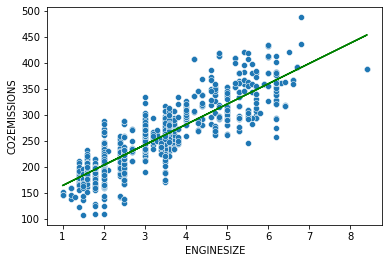

In [16]:
sns.scatterplot(data=data,x='ENGINESIZE',y='CO2EMISSIONS')
plt.plot(data['ENGINESIZE'], y_model, color='green')

In [17]:
mean_absolute_error(data['CO2EMISSIONS'], y_model)

23.346887834400427

In [18]:
mean_squared_error(data['CO2EMISSIONS'], y_model)

946.3140527188748

In [19]:
r2_score(data['CO2EMISSIONS'], y_model)

0.7641458597854816

In [20]:
# Part 3: FEATURE SELECTION & TRAINING

In [21]:
X_train, X_test, y_train, y_test=train_test_split(data[['ENGINESIZE']],data['CO2EMISSIONS'],\
                                                  test_size=0.2,shuffle=True,random_state=42)

#test_size=0.2: it's mean 20% All_Data for test and 80% All_Data for compare
#shuffle: mix data before random
#random_state: ID for random. Remember the random shuffle, to recall when needed. avoid mixing again and again.

In [22]:
model=LinearRegression()
model.fit(data[['ENGINESIZE']], data['CO2EMISSIONS'])
y_pred=model.predict(data[['ENGINESIZE']])
y_pred

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [23]:
mean_absolute_error(data['CO2EMISSIONS'], y_pred)

23.346887834400427

In [24]:
mean_squared_error(data['CO2EMISSIONS'], y_pred)

946.3140527188748

In [25]:
r2_score(data['CO2EMISSIONS'], y_pred)

0.7641458597854816

In [26]:
from sklearn.model_selection import KFold, cross_val_score

In [27]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
#Calculator Cross Valution Score compare with R2 Score. Go to concluded: Under/ Over Fitting

array([0.72508571, 0.74330385, 0.78385585, 0.76907905, 0.77848554])

In [28]:
# OPTIMIZE MODEL
# TUNING

In [29]:
X_train, X_test, y_train, y_test=train_test_split(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],data['CO2EMISSIONS'],\
                                                  test_size=0.2,shuffle=True,random_state=42)

In [30]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
333,1.4,4,7.8
106,4.4,8,12.7
585,3.0,6,9.9
55,3.0,6,11.4
213,5.3,8,16.5


In [31]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred2=model.predict(X_test)
y_pred2

array([302.95237705, 240.91489956, 272.50244127, 235.31017981,
       204.07702562, 245.78307279, 304.87320139, 283.65078533,
       309.17145244, 307.72944493, 287.73574015, 391.1248773 ,
       252.78536659, 251.38779254, 262.02954829, 255.19611726,
       210.0661428 , 250.60457413, 190.07243802, 307.77387839,
       318.69226424, 205.64346244, 256.59369131, 248.86927454,
       261.96845285, 197.07473182, 205.0291068 , 186.2641133 ,
       309.06368511, 248.97704187, 390.77380382, 203.80039551,
       205.64346244, 327.26099486, 238.16642335, 286.76699699,
       277.01622698, 399.17367168, 199.31661972, 204.92133946,
       176.7433015 , 187.21619448, 186.87846894, 209.68174536,
       279.84246061, 199.59324982, 244.83099161, 259.11220931,
       192.65205146, 362.85573398, 315.0061304 , 278.21492835,
       211.69367506, 267.91089814, 264.82469639, 315.39052783,
       388.70077869, 322.73054717, 191.69997028, 278.44488656,
       301.77033767, 270.82823712, 290.0687334 , 254.41

In [32]:
mean_absolute_error(y_test, y_pred2)

16.721593983516495

In [33]:
mean_squared_error(y_test, y_pred2)

512.8551370148305

In [57]:
r2_score(y_test, y_pred2)

0.8759705206914069

In [89]:
from sklearn.feature_selection import RFE # Returns Feature Elimination
from sklearn.model_selection import GridSearchCV
#
X_train, X_test, y_train, y_test=train_test_split(data.select_dtypes(exclude='category').\
                                                  drop(['MODELYEAR','CO2EMISSIONS'], axis=1),\
                                                  data['CO2EMISSIONS'], test_size=0.2,shuffle=True,random_state=42)
# Because 1 year, We must drop 2 columns "Model Year" and "CO2 Emissions" into "CO2 Emissions"

In [90]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
333,1.4,4,8.5,6.9,7.8,36
106,4.4,8,15.0,9.8,12.7,22
585,3.0,6,11.2,8.4,9.9,29
55,3.0,6,13.2,9.2,11.4,25
213,5.3,8,18.3,14.2,16.5,17


In [91]:
param={'n_features_to_select':list(range(1,10))}
# Because We have 9 feature format number, must have random 9 feature with together
#
lm=LinearRegression()
lm.fit(X_train, y_train)
rfe=RFE(ln)
#
model_cv=GridSearchCV(estimator=rfe, param_grid=param, scoring='r2', cv=folds, return_train_score=True)
# param_grid = param (9 cases happen), cv: cross valuation; folds: Kfold=5;
#
model_cv.fit(X_train, y_train)
# Put GridSearchCV into Train file: "fit"

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='r2')

In [92]:
pd.DataFrame(model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013156,0.004567,0.005296,0.002179,1,{'n_features_to_select': 1},0.725086,0.743304,0.783856,0.769079,...,0.759962,0.022320,9,0.771172,0.769215,0.759192,0.762272,0.760187,0.764408,0.004867
1,0.012308,0.000469,0.004469,0.000902,2,{'n_features_to_select': 2},0.824826,0.849626,0.857822,0.860602,...,0.852395,0.015123,8,0.860673,0.856333,0.854544,0.853243,0.851463,0.855251,0.003145
2,0.009520,0.000508,0.003729,0.000642,3,{'n_features_to_select': 3},0.826566,0.849762,0.860875,0.867154,...,0.854484,0.015411,6,0.861043,0.857068,0.860448,0.858146,0.858240,0.858989,0.001504
3,0.007964,0.001381,0.003631,0.000985,4,{'n_features_to_select': 4},0.826286,0.848690,0.857495,0.865247,...,0.853125,0.014997,7,0.861120,0.857275,0.860968,0.858326,0.858297,0.859197,0.001555
4,0.007652,0.000352,0.004144,0.000373,5,{'n_features_to_select': 5},0.829856,0.858337,0.881529,0.865378,...,0.864338,0.020084,5,0.866031,0.860698,0.886114,0.858336,0.884493,0.871134,0.011846
5,0.008189,0.005324,0.001649,0.002020,6,{'n_features_to_select': 6},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
6,0.010127,0.008297,0.007209,0.007114,7,{'n_features_to_select': 7},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
7,0.002591,0.003174,0.007227,0.006581,8,{'n_features_to_select': 8},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881
8,0.003276,0.003416,0.001639,0.002007,9,{'n_features_to_select': 9},0.855050,0.890515,0.881600,0.893757,...,0.881518,0.013841,1,0.890660,0.883614,0.886118,0.882343,0.884504,0.885448,0.002881


In [93]:
pd.DataFrame(model_cv.cv_results_).columns
# Care about: param_n_features_to_select

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_features_to_select', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'r2_score')

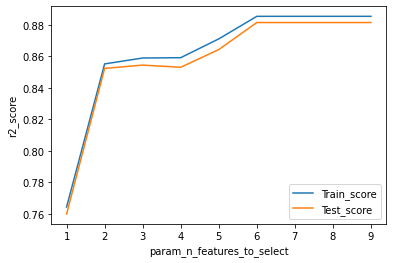

In [95]:
cv_results=pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_test_score'])
plt.legend(['Train_score', 'Test_score'], loc='lower right')
plt.xlabel('param_n_features_to_select')
plt.ylabel('r2_score')

In [106]:
lm=LinearRegression()
lm.fit(X_train, y_train)
rfe= RFE(estimator=lm, n_features_to_select=6)
#
rfe.fit(X_train, y_train)
y_pred3= rfe.predict(X_test)

In [102]:
print(r2_score(y_test, y_pred2))
print(r2_score(y_test, y_pred3))

0.8759705206914069
0.9034041224574011
